Import Libraries

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn import datasets
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv("drive/MyDrive/datasets/dataset.csv", index_col=0)
column_names = list(df.columns)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Droping Infrequent Values

In [ ]:
"""print(len(df))
from collections import Counter
element_counter = Counter()
for el in df['279'].unique():
  element_counter[el] += len(df[df['279'] == el])
element_counter = sorted(element_counter.items())
for el in element_counter:
  if el[1] <= 5:
    df = df.drop(list(df[df['279'] == el[0]].index))
len(df)"""

"print(len(df))\nfrom collections import Counter\nelement_counter = Counter()\nfor el in df['279'].unique():\n  element_counter[el] += len(df[df['279'] == el])\nelement_counter = sorted(element_counter.items())\nfor el in element_counter:\n  if el[1] <= 5:\n    df = df.drop(list(df[df['279'] == el[0]].index))\nlen(df)"

In [ ]:
data = df.iloc[:, 0:279].replace(' ', np.nan)
target = df.iloc[:, 279].astype('int32')

In [ ]:
target[target == 1] = 0
target[target > 1] = 1
target

0      1
1      1
2      1
3      0
4      1
      ..
447    0
448    1
449    1
450    0
451    0
Name: 279, Length: 452, dtype: int32

In [ ]:
# Replacing outlliers with NaN
"""data['2'][141] = np.nan #height
data['2'][316] = np.nan #height
data['3'][213] = np.nan
data['5'][393] = np.nan
data['223'][379] = np.nan #reduced accuracy
data['196'][388] = np.nan # did not reduce accuracy
data['256'][85] = np.nan
data['256'][449] = np.nan"""

"data['2'][141] = np.nan #height\ndata['2'][316] = np.nan #height\ndata['3'][213] = np.nan\ndata['5'][393] = np.nan\ndata['223'][379] = np.nan #reduced accuracy\ndata['196'][388] = np.nan # did not reduce accuracy\ndata['256'][85] = np.nan\ndata['256'][449] = np.nan"

Predict Missing Values Using Simple Imputer

In [ ]:
simpleimputer = SimpleImputer(missing_values=np.nan, strategy='median')
data= pd.DataFrame(simpleimputer.fit_transform(data), columns=column_names[0:279])

In [ ]:
"""#len(data.columns)
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(data,target)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=data.columns)
feat_importances.nsmallest(30).plot(kind='barh')
plt.show()
#print(feat_importances.nsmallest(30))
for index, col in enumerate(feat_importances):
  #print(f"{index}:{col}")
  if col == 0.00:
    data = data.drop(columns=[str(index)])
#len(data.columns)"""

'#len(data.columns)\nfrom sklearn.ensemble import ExtraTreesClassifier\nimport matplotlib.pyplot as plt\nmodel = ExtraTreesClassifier()\nmodel.fit(data,target)\n#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers\n#plot graph of feature importances for better visualization\nfeat_importances = pd.Series(model.feature_importances_, index=data.columns)\nfeat_importances.nsmallest(30).plot(kind=\'barh\')\nplt.show()\n#print(feat_importances.nsmallest(30))\nfor index, col in enumerate(feat_importances):\n  #print(f"{index}:{col}")\n  if col == 0.00:\n    data = data.drop(columns=[str(index)])\n#len(data.columns)'

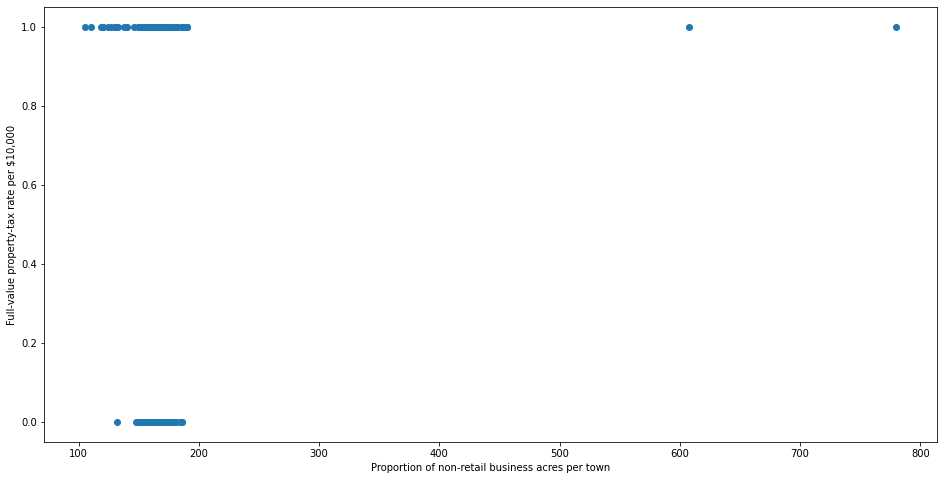

320


In [ ]:
import matplotlib.pyplot as plt
X = '2'
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data[X], target)
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()
print(data[X].argmin())

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.3, random_state=1)
accuracy_df = pd.DataFrame(columns=["Test", "F1", "Accuracy"])

Neural Network

In [ ]:
neuralnetwork = MLPClassifier(hidden_layer_sizes=50)
neuralnetwork.fit(train_data, train_target)
NN_test_result = neuralnetwork.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, NN_test_result))
print("Accurace Score:", accuracy_score(test_target, NN_test_result))
print("F1 Score:", f1_score(test_target, NN_test_result, average='weighted'))
temp = pd.DataFrame([["NN", f1_score(test_target, NN_test_result, average='weighted'), accuracy_score(test_target, NN_test_result)]], columns=["Test","F1", "Accuracy"])
accuracy_df = accuracy_df.append(temp, ignore_index=True)
accuracy_df


confusion_matrix: [[57 16]
 [21 42]]
Accurace Score: 0.7279411764705882
F1 Score: 0.7268244115554383


,Test,F1,Accuracy
0,NN,0.726824,0.727941


AdaBoost Classifier

In [ ]:
adaboost = AdaBoostClassifier(n_estimators=50)
adaboost.fit(train_data, train_target)
ADA_test_result = adaboost.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, ADA_test_result))
print("Accurace Score:", accuracy_score(test_target, ADA_test_result))
print("F1 Score:", f1_score(test_target, ADA_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["ab", f1_score(test_target, ADA_test_result, average='weighted'), accuracy_score(test_target, ADA_test_result)]], columns=["Test","F1", "Accuracy"]), ignore_index=True)
accuracy_df

confusion_matrix: [[60 13]
 [14 49]]
Accurace Score: 0.8014705882352942
F1 Score: 0.8013517406962786


,Test,F1,Accuracy
0,NN,0.726824,0.727941
1,ab,0.801352,0.801471


In [ ]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(train_data, train_target)
knn_test_result = knn.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, knn_test_result))
print("Accurace Score:", accuracy_score(test_target, knn_test_result))
print("F1 Score:", f1_score(test_target, knn_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["knn", f1_score(test_target, knn_test_result, average='weighted'), accuracy_score(test_target, knn_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[73  0]
 [53 10]]
Accurace Score: 0.6102941176470589
F1 Score: 0.5207210508626938


In [ ]:
gb = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gb.fit(train_data, train_target)
gb_test_result = gb.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, gb_test_result))
print("Accurace Score:", accuracy_score(test_target, gb_test_result))
print("F1 Score:", f1_score(test_target, gb_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["gb", f1_score(test_target, gb_test_result, average='weighted'), accuracy_score(test_target, gb_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[71  2]
 [24 39]]
Accurace Score: 0.8088235294117647
F1 Score: 0.8011204481792717


In [ ]:
nb = GaussianNB()
nb.fit(train_data, train_target)
nb_test_result = nb.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, nb_test_result))
print("Accurace Score:", accuracy_score(test_target, nb_test_result))
print("F1 Score:", f1_score(test_target, nb_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["nb", f1_score(test_target, nb_test_result, average='weighted'), accuracy_score(test_target, nb_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[68  5]
 [32 31]]
Accurace Score: 0.7279411764705882
F1 Score: 0.7120722697907329


In [ ]:
sv = SVC()
sv.fit(train_data, train_target)
sv_test_result = sv.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, sv_test_result))
print("Accurace Score:", accuracy_score(test_target, sv_test_result))
print("F1 Score:", f1_score(test_target, sv_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["sv", f1_score(test_target, sv_test_result, average='weighted'), accuracy_score(test_target, sv_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[66  7]
 [30 33]]
Accurace Score: 0.7279411764705882
F1 Score: 0.7160785552803302


In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=20)
rf.fit(train_data, train_target)
rf_test_result = rf.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, rf_test_result))
print("Accurace Score:", accuracy_score(test_target, rf_test_result))
print("F1 Score:", f1_score(test_target, rf_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["rf", f1_score(test_target, rf_test_result, average='weighted'), accuracy_score(test_target, rf_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[66  7]
 [18 45]]
Accurace Score: 0.8161764705882353
F1 Score: 0.8138245882678743


In [ ]:
%%time
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate=0.01, n_estimators=130, max_depth=11) #leaning rate, optimizer, loss fucntion, depth;
xg.fit(train_data, train_target)
xg_test_result = xg.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, xg_test_result))
print("Accurace Score:", accuracy_score(test_target, xg_test_result))
print("F1 Score:", f1_score(test_target, xg_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["xg", f1_score(test_target, xg_test_result, average='weighted'), accuracy_score(test_target, xg_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[64  9]
 [16 47]]
Accurace Score: 0.8161764705882353
F1 Score: 0.8149750096116878
CPU times: user 1.62 s, sys: 12 ms, total: 1.63 s
Wall time: 1.63 s


In [ ]:
%%time
selector = RFE(rf, n_features_to_select=100, step=1)
selector = selector.fit(train_data, train_target)
selector_test_result = selector.predict(test_data)
print("confusion_matrix:", confusion_matrix(test_target, selector_test_result))
print("Accurace Score:", accuracy_score(test_target, selector_test_result))
print("F1 Score:", f1_score(test_target, selector_test_result, average='weighted'))
accuracy_df = accuracy_df.append(pd.DataFrame([["rfe_rf_100", f1_score(test_target, selector_test_result, average='weighted'), accuracy_score(test_target, selector_test_result)]], columns=["Test","F1", "Accuracy"]))

confusion_matrix: [[65  8]
 [16 47]]
Accurace Score: 0.8235294117647058
F1 Score: 0.8221310095686966
CPU times: user 1min 8s, sys: 195 ms, total: 1min 8s
Wall time: 1min 8s


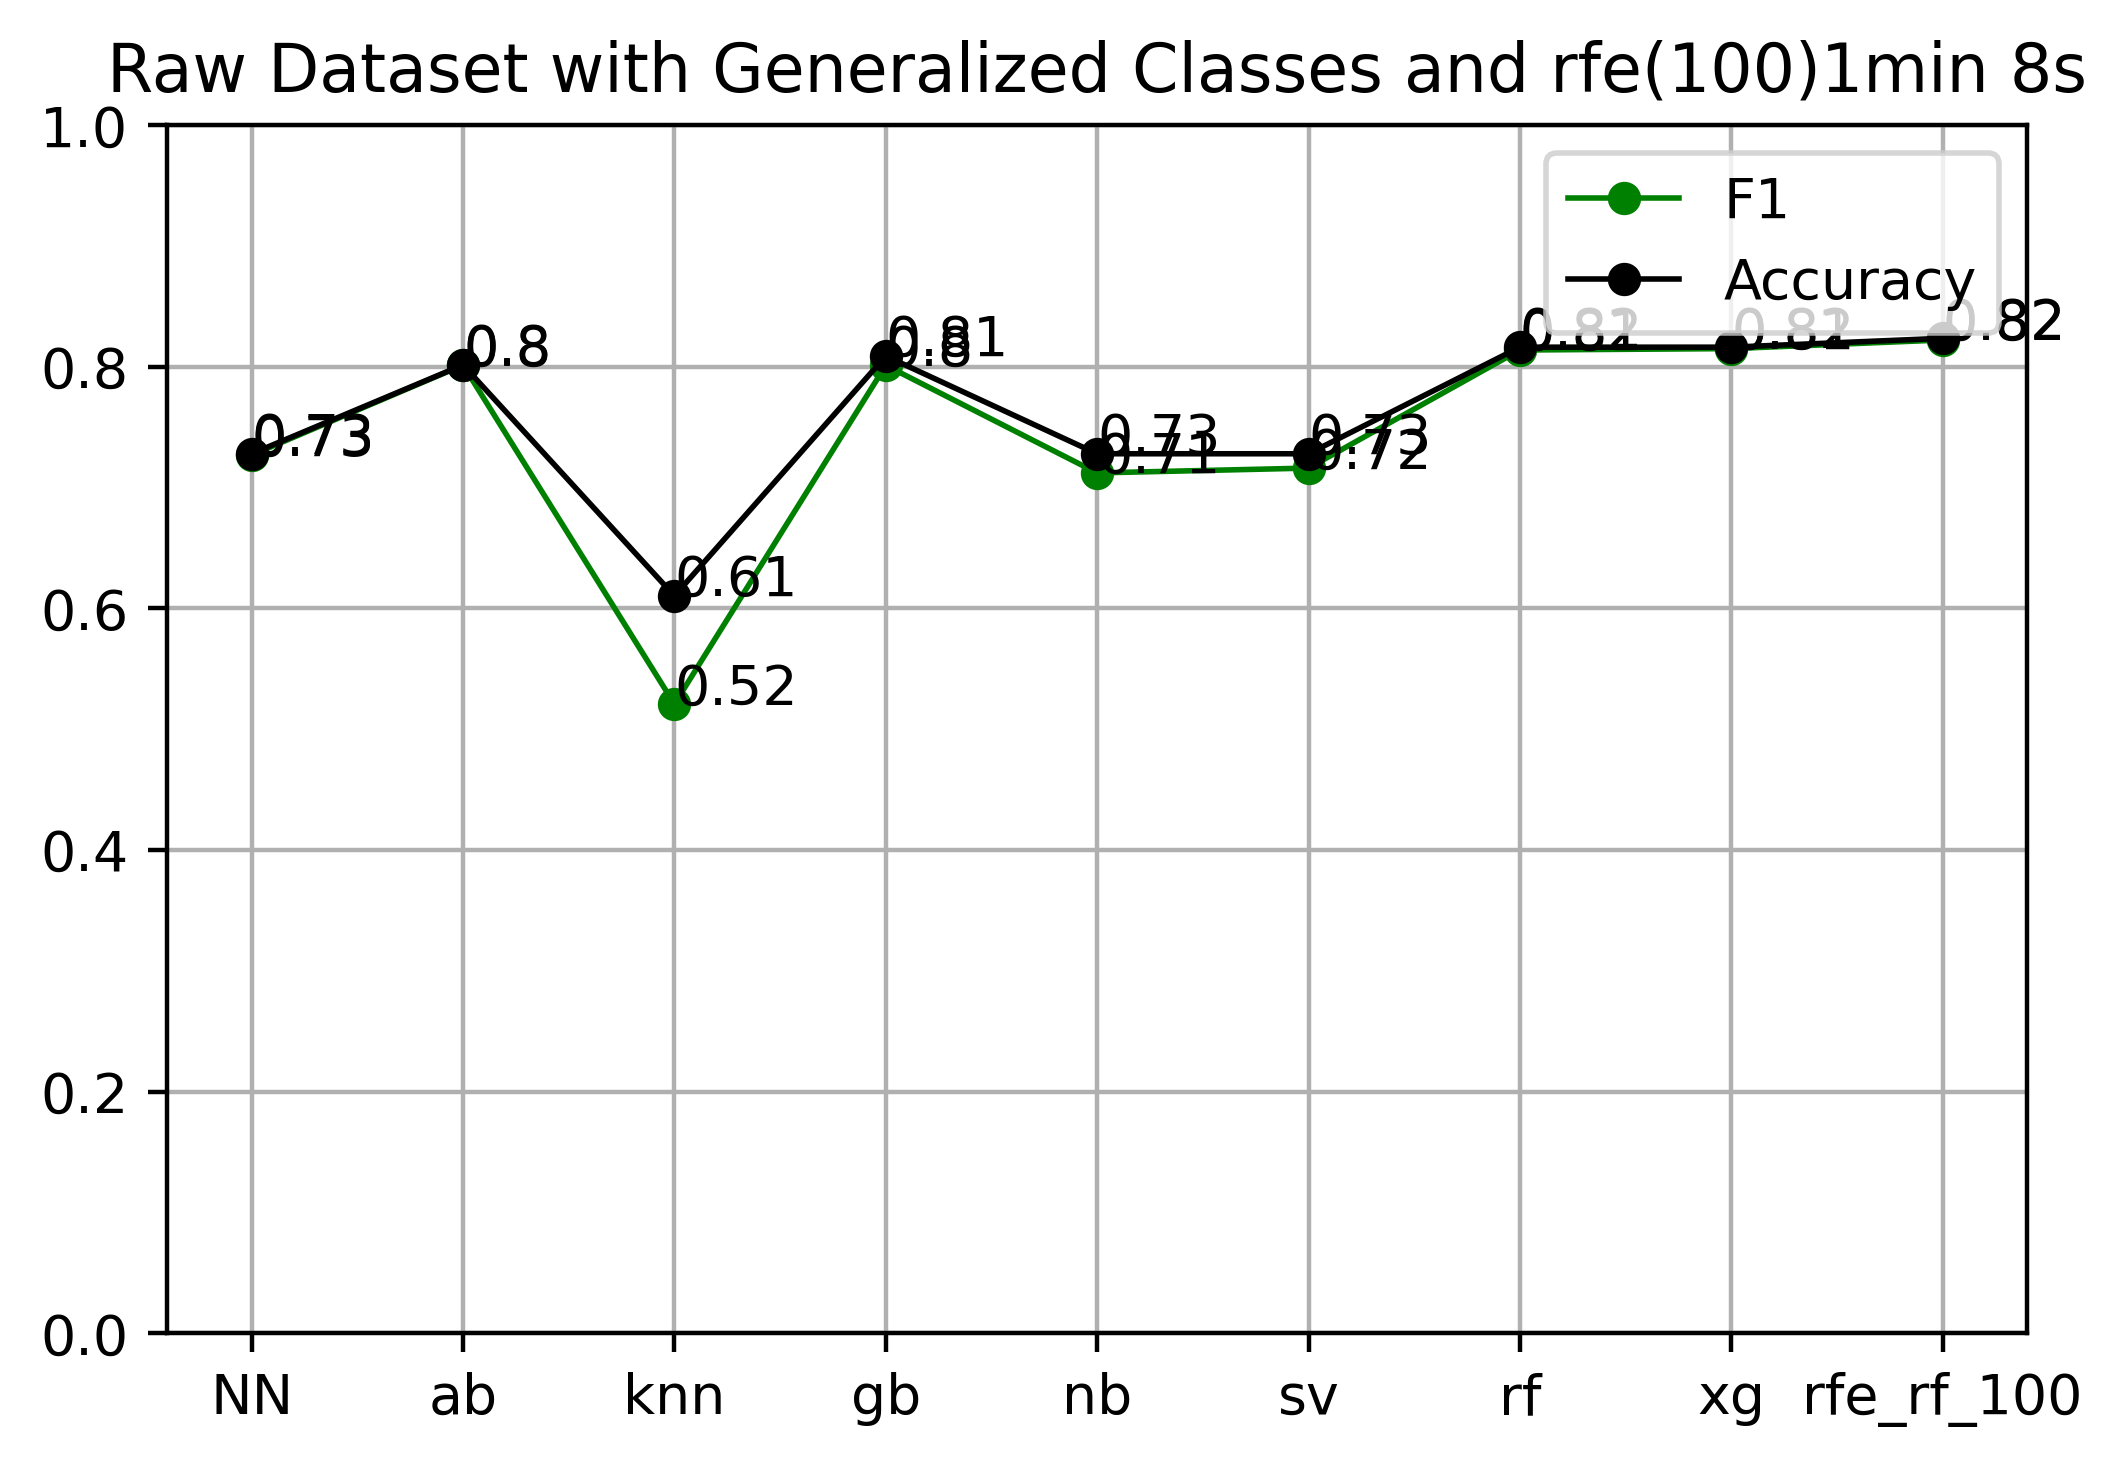

In [ ]:
#plt.figure(dpi=400)
nameofthefile= "Raw Dataset with Generalized Classes and rfe(100)1min 8s"
fig = plt.figure(dpi=400)
ax = fig.add_subplot(111)

plt.ylim(0, 1)
plt.plot( 'Test', 'F1', data=accuracy_df, marker='o', markerfacecolor='green', markersize=5, color='green', linewidth=1)
plt.plot( 'Test', 'Accuracy', data=accuracy_df, marker='o', markerfacecolor='black', markersize=5, color='black', linewidth=1)
plt.grid()

plt.legend()
for i, j in enumerate(accuracy_df['F1']):
  ax.annotate(str(round(j, 2)), (list(accuracy_df['Test'])[i],list(accuracy_df['F1'])[i]))
for i, j in enumerate(accuracy_df['Accuracy']):
  ax.annotate(str(round(j, 2)), (list(accuracy_df['Test'])[i],list(accuracy_df['Accuracy'])[i]))
plt.title(nameofthefile)
plt.savefig(f"drive/MyDrive/datasets/{nameofthefile}.png")
plt.show()

In [ ]:
"""new_train_target = []
#print(train_target)
for index, value in enumerate(train_target):
  new_train_target.append([])
  for i in range(1, 17):
    if i == value:
      new_train_target[index].append(1)
    else:
      new_train_target[index].append(0)
new_train_target = np.array(new_train_target)
new_test_target = []
#print(train_target)
for index, value in enumerate(test_target):
  new_test_target.append([])
  for i in range(1, 17):
    if i == value:
      new_test_target[index].append(1)
    else:
      new_test_target[index].append(0)
new_test_target = np.array(new_test_target)
print(new_test_target)"""

'new_train_target = []\n#print(train_target)\nfor index, value in enumerate(train_target):\n  new_train_target.append([])\n  for i in range(1, 17):\n    if i == value:\n      new_train_target[index].append(1)\n    else:\n      new_train_target[index].append(0)\nnew_train_target = np.array(new_train_target)\nnew_test_target = []\n#print(train_target)\nfor index, value in enumerate(test_target):\n  new_test_target.append([])\n  for i in range(1, 17):\n    if i == value:\n      new_test_target[index].append(1)\n    else:\n      new_test_target[index].append(0)\nnew_test_target = np.array(new_test_target)\nprint(new_test_target)'

In [ ]:
"""from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Embedding
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
from keras.layers.core import Dropout,Flatten
from keras.optimizers import Adam
model = Sequential()
LEN = len(train_data.columns)
print(LEN)
model.add(Dense(LEN, input_shape=(LEN, ), activation='relu'))
#model.add(Embedding(len(train_data), 280, input_length=len(train_data.columns)))
#model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(np.floor(np.sqrt(LEN)), activation='softmax'))
#model.add(Dense(np.floor(np.sqrt(LEN)), activation='relu'))
#model.add(Dense(np.floor(np.sqrt(LEN)), activation='softmax'))
model.add(Dropout(0.5)) #Dropout is decreasing accuracy
#model.add(Dense(12, activation='relu'))
#model.add(Dense(8, activation='relu'))
#model.add(Flatten())
#model.add(Dense(16, activation='sigmoid'))
model.add(Dense(16, activation='softmax'))
model.compile(Adam(lr=0.04), 'categorical_crossentropy', metrics=['accuracy'])
# compile the model
#adam = Adam(lr=0.001)
#model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
#print(model.summary())
model.fit(train_data, new_train_target, epochs=500)"""

"from keras.models import Sequential\nfrom keras.layers import Dense, LSTM\nfrom keras.layers import Embedding\nfrom keras.layers import RepeatVector\nfrom keras.layers import TimeDistributed\nfrom keras.callbacks import ModelCheckpoint\nfrom keras.layers.core import Dropout,Flatten\nfrom keras.optimizers import Adam\nmodel = Sequential()\nLEN = len(train_data.columns)\nprint(LEN)\nmodel.add(Dense(LEN, input_shape=(LEN, ), activation='relu'))\n#model.add(Embedding(len(train_data), 280, input_length=len(train_data.columns)))\n#model.add(Dense(12, input_dim=8, activation='relu'))\nmodel.add(Dense(np.floor(np.sqrt(LEN)), activation='softmax'))\n#model.add(Dense(np.floor(np.sqrt(LEN)), activation='relu'))\n#model.add(Dense(np.floor(np.sqrt(LEN)), activation='softmax'))\nmodel.add(Dropout(0.5)) #Dropout is decreasing accuracy\n#model.add(Dense(12, activation='relu'))\n#model.add(Dense(8, activation='relu'))\n#model.add(Flatten())\n#model.add(Dense(16, activation='sigmoid'))\nmodel.add(Dense

In [ ]:
"""PREDICTED = model.predict(test_data)
print(PREDICTED)
accuracy_counter = 0
for index, value in enumerate(PREDICTED):
  if np.argmax(value) == np.argmax(new_test_target[index]):
    accuracy_counter += 1
print(accuracy_counter/len(new_test_target))
np.argmax(new_test_target[1])"""

'PREDICTED = model.predict(test_data)\nprint(PREDICTED)\naccuracy_counter = 0\nfor index, value in enumerate(PREDICTED):\n  if np.argmax(value) == np.argmax(new_test_target[index]):\n    accuracy_counter += 1\nprint(accuracy_counter/len(new_test_target))\nnp.argmax(new_test_target[1])'

In [ ]:
"""from keras import callbacks
best_model_file = 'model.h5'
checkpoint = callbacks.ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')"""

"from keras import callbacks\nbest_model_file = 'model.h5'\ncheckpoint = callbacks.ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')"

In [ ]:
#model.fit(train_data, train_target, batch_size = 16, epochs=50, validation_data=(test_data, test_target), callbacks=[checkpoint],verbose=1) 